<a href="https://colab.research.google.com/github/vrlnarayana/capstone-gl/blob/main/lakshminarayanan_vader_sentiment_based_analysis_and_content_based_filtering_using_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project : Group 4 : Song Recommendation through content based filtering

MODIFIED by LAKSHMINARAYANAN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files
import warnings; warnings.simplefilter('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format   

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

**READ SONG DATA**

In [4]:
song_data_df =pd.read_csv(r'/content/drive/My Drive/songs_with_genre_year_location.csv')

In [5]:
song_data_df.duplicated(subset=['track_id']).value_counts()

False    112154
True        209
dtype: int64

There are 209 duplicate records in the song dataframe

In [6]:
song_data_df = song_data_df.drop_duplicates(subset=['track_id'])

**READ Bags of words, extracting them from the train dataset "**

In [7]:
#import file
lyrics = pd.read_table(r'/content/drive/My Drive/mxm_dataset_train.txt', error_bad_lines=False)

In [8]:
#change name of the column
lyrics.columns = ['Raw_Training']

# take the bag of word to use it later
words_train = lyrics.iloc[16]

#drop useless rows
lyrics=lyrics[17:].copy()

# get TrackID, MxMID and lyrics and put them separated columns
def sortdata(x):
    splitted = x['Raw_Training'].split(',')
    x['Tid']=splitted[0]
    #x['MXM_Tid']=splitted[1]
    x['words_freq']=splitted[2:]
    return x

#Apply the function to every column
lyrics = lyrics.apply(sortdata,axis=1)
lyrics = lyrics[['Tid','words_freq']]

In [9]:
#lyrics=lyrics.drop(columns=['index'])
lyrics.head()

,Tid,words_freq
17,TRAAAAV128F421A322,"[1:6, 2:4, 3:2, 4:2, 5:5, 6:3, 7:1, 8:1, 11:1,..."
18,TRAAABD128F429CF47,"[1:10, 3:17, 4:8, 5:2, 6:2, 7:1, 8:3, 9:2, 10:..."
19,TRAAAED128E0783FAB,"[1:28, 2:15, 3:2, 4:12, 5:22, 6:2, 7:2, 8:4, 9..."
20,TRAAAEF128F4273421,"[1:5, 2:4, 3:3, 4:2, 5:1, 6:11, 9:4, 12:9, 13:..."
21,TRAAAEW128F42930C0,"[1:4, 4:5, 5:7, 6:2, 7:4, 9:1, 10:1, 11:9, 15:..."


In [10]:
lyrics.to_pickle('mxm_dataset_train_lyrics.pkl')

There are no duplicates inn the lyrics dataframe

In [11]:
len(song_data_df)

112154

In [12]:
words_train

Raw_Training    %i,the,you,to,and,a,me,it,not,in,my,is,of,your...
Name: 16, dtype: object

In [13]:
len(lyrics['Tid'].unique())

210519

In [14]:
song_data_bow_df =pd.merge(song_data_df,lyrics,left_on='track_id', right_on='Tid',how='inner')

In [15]:
song_data_bow_df

,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,genre,Tid,words_freq
0,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12..."
1,SOOLRHW12A8C142643,All of the same blood,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,Pop_Rock,TRMMMKQ128F92EBCB5,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ..."
2,SOVOIOQ12AC4688FAC,The Rest of the Night,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",Pop_Rock,TRMMWNY12903CF28D2,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1..."
3,SOGXPYA12A58A769A7,Rock Can't Last Forever (You Hate Me Hate Mus...,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",Pop_Rock,TRMMGDQ128F4277AE7,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ..."
4,SOWSOVJ12A8C13A8C1,Zuviel Hitze,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",Pop_Rock,TRMMHVN128F428E67E,"[3:1, 10:5, 14:1, 20:1, 28:2, 32:1, 33:1, 73:1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,SOKDSNF12A8C139164,Carry Me High,God,Rebecca St. James,1996,TRYYOXP128F428F303,ARD0ROE1187FB46A17,279.95,0.70,0.51,-33.87,151.21,"Sydney, New South Wales, Australi",Religious,TRYYOXP128F428F303,"[1:8, 2:9, 3:14, 4:9, 7:29, 9:2, 10:1, 14:4, 1..."
40624,SOKQRMK12A8C134E85,Ich denk an...,Es wird Morgen,2raumwohnung,2004,TRYYOOB128F424FF58,ARNJVSL1187B99AFD4,221.18,0.66,0.40,52.52,13.38,"Berlin, Germany",Electronic,TRYYOOB128F424FF58,"[10:5, 22:3, 28:1, 54:1, 97:3, 122:8, 123:2, 1..."
40625,SOOXIGM12AB018B4A7,I Will Always Go On Missing You,Heart To Believe,Itchy Poopzkid,2007,TRYYXJO128F933B2E4,AR8YUTR1187B9B82E1,189.81,0.58,0.49,52.88,-1.97,Inglaterra,Pop_Rock,TRYYXJO128F933B2E4,"[1:30, 2:6, 3:14, 4:1, 5:11, 7:5, 8:5, 9:10, 1..."
40626,SOZZIBA12AB0184030,Iris Art,Lustra,Echobelly,1997,TRYYXBT128F932E725,AROB7AO1187B9B4F00,224.84,0.53,0.40,51.51,-0.13,"London, England",Pop_Rock,TRYYXBT128F932E725,"[1:3, 2:1, 3:8, 4:1, 5:1, 6:13, 7:13, 8:1, 9:2..."


In [16]:
#Displaying the results
print(song_data_bow_df.shape)
display(song_data_bow_df.head())

(40628, 16)


,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,genre,Tid,words_freq
0,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12..."
1,SOOLRHW12A8C142643,All of the same blood,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,Pop_Rock,TRMMMKQ128F92EBCB5,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ..."
2,SOVOIOQ12AC4688FAC,The Rest of the Night,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",Pop_Rock,TRMMWNY12903CF28D2,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1..."
3,SOGXPYA12A58A769A7,Rock Can't Last Forever (You Hate Me Hate Mus...,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",Pop_Rock,TRMMGDQ128F4277AE7,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ..."
4,SOWSOVJ12A8C13A8C1,Zuviel Hitze,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",Pop_Rock,TRMMHVN128F428E67E,"[3:1, 10:5, 14:1, 20:1, 28:2, 32:1, 33:1, 73:1..."



**From generic bags of words to lyrics**

In [17]:
#get the word data
bag_of_words = words_train
# clean the data and split it to create a list of 5000 words
bag_of_words = bag_of_words.str.replace('%','')
bag_of_words = bag_of_words.str.split(',')

display(bag_of_words.head())


Raw_Training    [i, the, you, to, and, a, me, it, not, in, my,...
Name: 16, dtype: object

In [18]:
#Defining a function
def create_text(words_freq):
    #create the final list of all words
    list_words=''
    #iterate over every id of words
    for compteur in words_freq:
        
        word = bag_of_words[0][int(compteur.split(':')[0])-1]
        times = int(compteur.split(':')[1])
        
        #Separating every word with a space to be able to work on it with librairies during part 2
        for i in range(times):
            list_words += ' ' + word + ' '
    return list_words

In [19]:
#Testing the function
print(create_text(lyrics.iloc[0]['words_freq']))

 i  i  i  i  i  i  the  the  the  the  you  you  to  to  and  and  and  and  and  a  a  a  me  it  my  is  is  of  of  of  your  that  are  are  we  we  am  am  will  will  for  for  for  for  be  have  have  so  this  like  like  de  up  was  was  if  got  would  been  these  these  seem  someon  understand  pass  river  met  piec  damn  worth  flesh  grace  poor  poor  somehow  ignor  passion  tide  season  seed  resist  order  order  piti  fashion  grant  captur  captur  ici  soil  patienc  social  social  highest  highest  slice  leaf  lifeless  arrang  wilder  shark  devast  element 


In [20]:
song_data_bow_df['text'] = song_data_bow_df['words_freq'].apply(create_text)

In [21]:
song_data_bow_df

,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,genre,Tid,words_freq,text
0,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12...",the the the the the the the the the ...
1,SOOLRHW12A8C142643,All of the same blood,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,Pop_Rock,TRMMMKQ128F92EBCB5,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ...",the the the the the the the the the ...
2,SOVOIOQ12AC4688FAC,The Rest of the Night,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",Pop_Rock,TRMMWNY12903CF28D2,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1...",i the the the the the the the the th...
3,SOGXPYA12A58A769A7,Rock Can't Last Forever (You Hate Me Hate Mus...,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",Pop_Rock,TRMMGDQ128F4277AE7,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ...",i i i i i the you you you you to t...
4,SOWSOVJ12A8C13A8C1,Zuviel Hitze,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",Pop_Rock,TRMMHVN128F428E67E,"[3:1, 10:5, 14:1, 20:1, 28:2, 32:1, 33:1, 73:1...",you in in in in in your am so so wi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,SOKDSNF12A8C139164,Carry Me High,God,Rebecca St. James,1996,TRYYOXP128F428F303,ARD0ROE1187FB46A17,279.95,0.70,0.51,-33.87,151.21,"Sydney, New South Wales, Australi",Religious,TRYYOXP128F428F303,"[1:8, 2:9, 3:14, 4:9, 7:29, 9:2, 10:1, 14:4, 1...",i i i i i i i i the the the the t...
40624,SOKQRMK12A8C134E85,Ich denk an...,Es wird Morgen,2raumwohnung,2004,TRYYOOB128F424FF58,ARNJVSL1187B99AFD4,221.18,0.66,0.40,52.52,13.38,"Berlin, Germany",Electronic,TRYYOOB128F424FF58,"[10:5, 22:3, 28:1, 54:1, 97:3, 122:8, 123:2, 1...",in in in in in all all all so was d...
40625,SOOXIGM12AB018B4A7,I Will Always Go On Missing You,Heart To Believe,Itchy Poopzkid,2007,TRYYXJO128F933B2E4,AR8YUTR1187B9B82E1,189.81,0.58,0.49,52.88,-1.97,Inglaterra,Pop_Rock,TRYYXJO128F933B2E4,"[1:30, 2:6, 3:14, 4:1, 5:11, 7:5, 8:5, 9:10, 1...",i i i i i i i i i i i i i i i ...
40626,SOZZIBA12AB0184030,Iris Art,Lustra,Echobelly,1997,TRYYXBT128F932E725,AROB7AO1187B9B4F00,224.84,0.53,0.40,51.51,-0.13,"London, England",Pop_Rock,TRYYXBT128F932E725,"[1:3, 2:1, 3:8, 4:1, 5:1, 6:13, 7:13, 8:1, 9:2...",i i i the you you you you you you y...


In [22]:
song_data_bow_df = song_data_bow_df.set_index('title')
song_data_bow_df.head(4)

,song_id,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,genre,Tid,words_freq,text
title,,,,,,,,,,,,,,,,
(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12...",the the the the the the the the the ...
All of the same blood,SOOLRHW12A8C142643,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,Pop_Rock,TRMMMKQ128F92EBCB5,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ...",the the the the the the the the the ...
The Rest of the Night,SOVOIOQ12AC4688FAC,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",Pop_Rock,TRMMWNY12903CF28D2,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1...",i the the the the the the the the th...
Rock Can't Last Forever (You Hate Me Hate Music Album Version),SOGXPYA12A58A769A7,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",Pop_Rock,TRMMGDQ128F4277AE7,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ...",i i i i i the you you you you to t...


In [23]:
import pprint
import pandas as pd
import numpy as np
import pickle
import joblib

In [24]:
list(song_data_bow_df['text'][:10])

[' the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  to  to  and  and  and  and  and  and  and  and  a  a  me  it  it  it  it  it  it  in  in  in  in  in  in  in  in  is  is  is  is  is  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  that  that  that  that  that  on  on  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  will  will  all  all  for  for  for  for  for  for  for  be  be  have  so  know  this  with  with  with  with  like  now  now  up  up  up  one  one  one  out  down  down  down  down  down  down  down  down  get  see  got  from  from  make  make  day  her  h

In [25]:
document = song_data_bow_df['text'][0]

In [26]:
document

' the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  the  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  you  to  to  and  and  and  and  and  and  and  and  a  a  me  it  it  it  it  it  it  in  in  in  in  in  in  in  in  is  is  is  is  is  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  of  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  your  that  that  that  that  that  on  on  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  are  will  will  all  all  for  for  for  for  for  for  for  be  be  have  so  know  this  with  with  with  with  like  now  now  up  up  up  one  one  one  out  down  down  down  down  down  down  down  down  get  see  got  from  from  make  make  day  her  he

In [27]:
text_corpus = list(song_data_bow_df['text'])

In [28]:
# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
print(processed_corpus[:1])

[['you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'me', 'it', 'it', 'it', 'it', 'it', 'it', 'is', 'is', 'is', 'is', 'is', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'your', 'that', 'that', 'that', 'that', 'that', 'on', 'on', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'will', 'will', 'all', 'all', 'be', 'be', 'have', 'so', 'know', 'this', 'with', 'with', 'with', 'with', 'like', 'now', 'now', 'up', 'up', 'up', 'one', 'one', 'one', 'out', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'get', 'see', 'got', 'from', 'from', 'make', 'make', 'day', 'her', 'her', 'her', 'her', 'her', 'heart', 'heart', 'heart', 'heart', 'heart', 'heart', 'heart', 'heart', 'heart', 'night', 'night', 'night', 'nigh

In [29]:
# pickle processed_corpus list
lyrics_processed_corpus_pkl = "lyrics_processed_corpus.pkl"   
pickle.dump(processed_corpus,open( lyrics_processed_corpus_pkl, "wb" ))

In [30]:
processed_corpus = pickle.load( open( "lyrics_processed_corpus.pkl", "rb" ) )

In [31]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
#print(dictionary)

In [32]:
len(dictionary.token2id)

4991

In [33]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
print(bow_corpus[:1])

[[(0, 1), (1, 2), (2, 17), (3, 3), (4, 3), (5, 2), (6, 2), (7, 3), (8, 6), (9, 2), (10, 3), (11, 1), (12, 2), (13, 2), (14, 2), (15, 2), (16, 1), (17, 8), (18, 2), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 9), (32, 5), (33, 5), (34, 6), (35, 2), (36, 1), (37, 1), (38, 1), (39, 6), (40, 1), (41, 2), (42, 2), (43, 1), (44, 2), (45, 9), (46, 1), (47, 2), (48, 2), (49, 3), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 12), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 2), (66, 2), (67, 1), (68, 5), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 2), (78, 3), (79, 2), (80, 1), (81, 4), (82, 25), (83, 17)]]


In [34]:
# MODEL
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "Silent Night".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(45, 0.3793969656399331), (1237, 0.9252339933569299)]


In [35]:
joblib_file = 'lyrics_gensim_tfidf_model.pkl'
joblib.dump(tfidf, joblib_file)

['lyrics_gensim_tfidf_model.pkl']

In [36]:
tfidf = joblib.load('lyrics_gensim_tfidf_model.pkl')

In [37]:
# Compute similarity against a corpus of documents by storing the sparse index matrix in memory. 
# The similarity measure used in cosine is between two vectors.

from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=len(dictionary.token2id))

In [38]:
# pickle bow_corpus list
lyrics_gensim_sparse_similarities_pkl = "lyrics_gensim_sparse_similarities.pkl"   
pickle.dump(index,open( lyrics_gensim_sparse_similarities_pkl, "wb" ))

In [39]:
index = pickle.load( open( "lyrics_gensim_sparse_similarities.pkl", "rb" ) )

In [40]:
# testing
query_document = "The Rest of the Night".lower().split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
sims

array([0.07643083, 0.        , 0.4767276 , ..., 0.        , 0.        ,
       0.01552732], dtype=float32)

In [41]:
doc_l = []
score_l = []
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    doc_l.append(document_number)
    score_l.append(score)
  

In [42]:
recommended_songs = pd.DataFrame(score_l,doc_l).head(10)
recommended_songs=recommended_songs.reset_index()
recommended_songs.columns = ['index','score']
recommended_songs.set_index('index',inplace = True)
recommended_songs

,score
index,
23879,0.51
21610,0.48
2,0.48
6420,0.47
1127,0.45
8787,0.42
29020,0.39
15443,0.39
7023,0.39


In [43]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.6MB/s 


In [44]:
import nltk.sentiment.sentiment_analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [45]:
analyser = SentimentIntensityAnalyzer()

In [46]:
song_data_bow_df.reset_index()

,title,song_id,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,genre,Tid,words_freq,text
0,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12...",the the the the the the the the the ...
1,All of the same blood,SOOLRHW12A8C142643,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,Pop_Rock,TRMMMKQ128F92EBCB5,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ...",the the the the the the the the the ...
2,The Rest of the Night,SOVOIOQ12AC4688FAC,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",Pop_Rock,TRMMWNY12903CF28D2,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1...",i the the the the the the the the th...
3,Rock Can't Last Forever (You Hate Me Hate Mus...,SOGXPYA12A58A769A7,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",Pop_Rock,TRMMGDQ128F4277AE7,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ...",i i i i i the you you you you to t...
4,Zuviel Hitze,SOWSOVJ12A8C13A8C1,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",Pop_Rock,TRMMHVN128F428E67E,"[3:1, 10:5, 14:1, 20:1, 28:2, 32:1, 33:1, 73:1...",you in in in in in your am so so wi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,Carry Me High,SOKDSNF12A8C139164,God,Rebecca St. James,1996,TRYYOXP128F428F303,ARD0ROE1187FB46A17,279.95,0.70,0.51,-33.87,151.21,"Sydney, New South Wales, Australi",Religious,TRYYOXP128F428F303,"[1:8, 2:9, 3:14, 4:9, 7:29, 9:2, 10:1, 14:4, 1...",i i i i i i i i the the the the t...
40624,Ich denk an...,SOKQRMK12A8C134E85,Es wird Morgen,2raumwohnung,2004,TRYYOOB128F424FF58,ARNJVSL1187B99AFD4,221.18,0.66,0.40,52.52,13.38,"Berlin, Germany",Electronic,TRYYOOB128F424FF58,"[10:5, 22:3, 28:1, 54:1, 97:3, 122:8, 123:2, 1...",in in in in in all all all so was d...
40625,I Will Always Go On Missing You,SOOXIGM12AB018B4A7,Heart To Believe,Itchy Poopzkid,2007,TRYYXJO128F933B2E4,AR8YUTR1187B9B82E1,189.81,0.58,0.49,52.88,-1.97,Inglaterra,Pop_Rock,TRYYXJO128F933B2E4,"[1:30, 2:6, 3:14, 4:1, 5:11, 7:5, 8:5, 9:10, 1...",i i i i i i i i i i i i i i i ...
40626,Iris Art,SOZZIBA12AB0184030,Lustra,Echobelly,1997,TRYYXBT128F932E725,AROB7AO1187B9B4F00,224.84,0.53,0.40,51.51,-0.13,"London, England",Pop_Rock,TRYYXBT128F932E725,"[1:3, 2:1, 3:8, 4:1, 5:1, 6:13, 7:13, 8:1, 9:2...",i i i the you you you you you you y...


In [47]:

#Applying the polarity analysis for the bags of words
for i in song_data_bow_df.index:
    song_data_bow_df.at[i, 'Polarity_score'] = analyser.polarity_scores(song_data_bow_df.at[i, 'text'])['compound']
    
#Sorting values to have a meaningfull plot
#song_data_bow_df = song_data_bow_df.sort_values('Polarity_score', ascending=False)

In [49]:
sentiment_category = ['happy' if score > 0 
                          else 'sad' if score < 0 
                              else 'neutral' 
                                  for score in song_data_bow_df['Polarity_score']]
    

In [50]:
sentiment_category[:10]

['happy',
 'sad',
 'happy',
 'happy',
 'sad',
 'happy',
 'happy',
 'neutral',
 'happy',
 'happy']

In [51]:
# sentiment statistics per lyrics
song_data_bow_df['sentiment_category'] = sentiment_category


sentiment_category
happy      25754
neutral      901
sad        13973
Name: song_id, dtype: int64


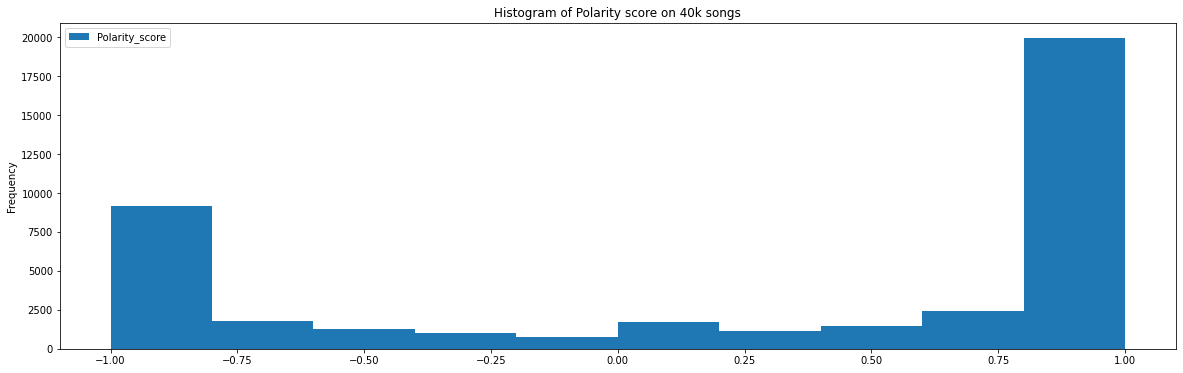

In [52]:
song_data_bow_df['Polarity_score'].plot(kind='hist',legend=True, title='Histogram of Polarity score on 40k songs')
print(song_data_bow_df.groupby('sentiment_category')['song_id'].agg('count'))

In [53]:
song_data_bow_df.genre = song_data_bow_df.genre.astype('category')
song_data_bow_df.release = song_data_bow_df.release.astype('category')
song_data_bow_df.sentiment_category = song_data_bow_df.sentiment_category.astype('category')


In [54]:
song_data_bow_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40628 entries, (Looking For) The Heart Of Saturday to Feeding The Demons
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   song_id             40628 non-null  object  
 1   release             40628 non-null  category
 2   artist_name         40628 non-null  object  
 3   year                40628 non-null  int64   
 4   track_id            40628 non-null  object  
 5   artist_id           40628 non-null  object  
 6   duration            40628 non-null  float64 
 7   artist_familiarity  40628 non-null  float64 
 8   artist_hotttnesss   40628 non-null  float64 
 9   lat                 40628 non-null  float64 
 10  long                40628 non-null  float64 
 11  location            40628 non-null  object  
 12  genre               40628 non-null  category
 13  Tid                 40628 non-null  object  
 14  words_freq          40628 non-null  object  

In [55]:
song_data_bow_df.to_pickle('song_data_bow_df.pkl')